In [1]:
#### IF you are using Google colab only then please do the following to make it easy to work in colab. 
# Uncomment and run cells in colab
#-----------------------------------------------------------------------------------------------

# 1. Mount ur google drive where the course folder is downloaded.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 2. Set the path to the course directory
# import os
# os.chdir('/content/drive/My Drive/Course-1-Deep-Learning-Mastery-Build-Your-AI-Foundation-main/Section5-DL-ComputerVision-P1')
# print("Current Directory:", os.getcwd())

In [3]:
# 3. install the following libraries. u can install any other library also with !pip install "library"
# !pip install tensorflow numpy pandas matplotlib

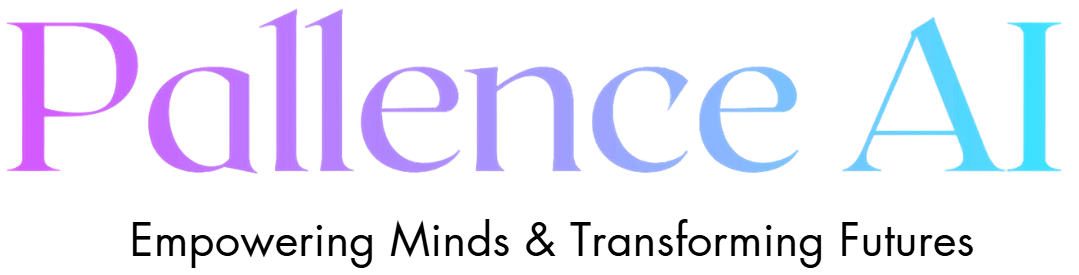

In [1]:
from IPython.display import Image, display
display(Image("./images/PallenceAI-FinAal.png", width=800))

# Data Augumentation

### Build model by training on CIFAR Dataset, but now with data augumentation

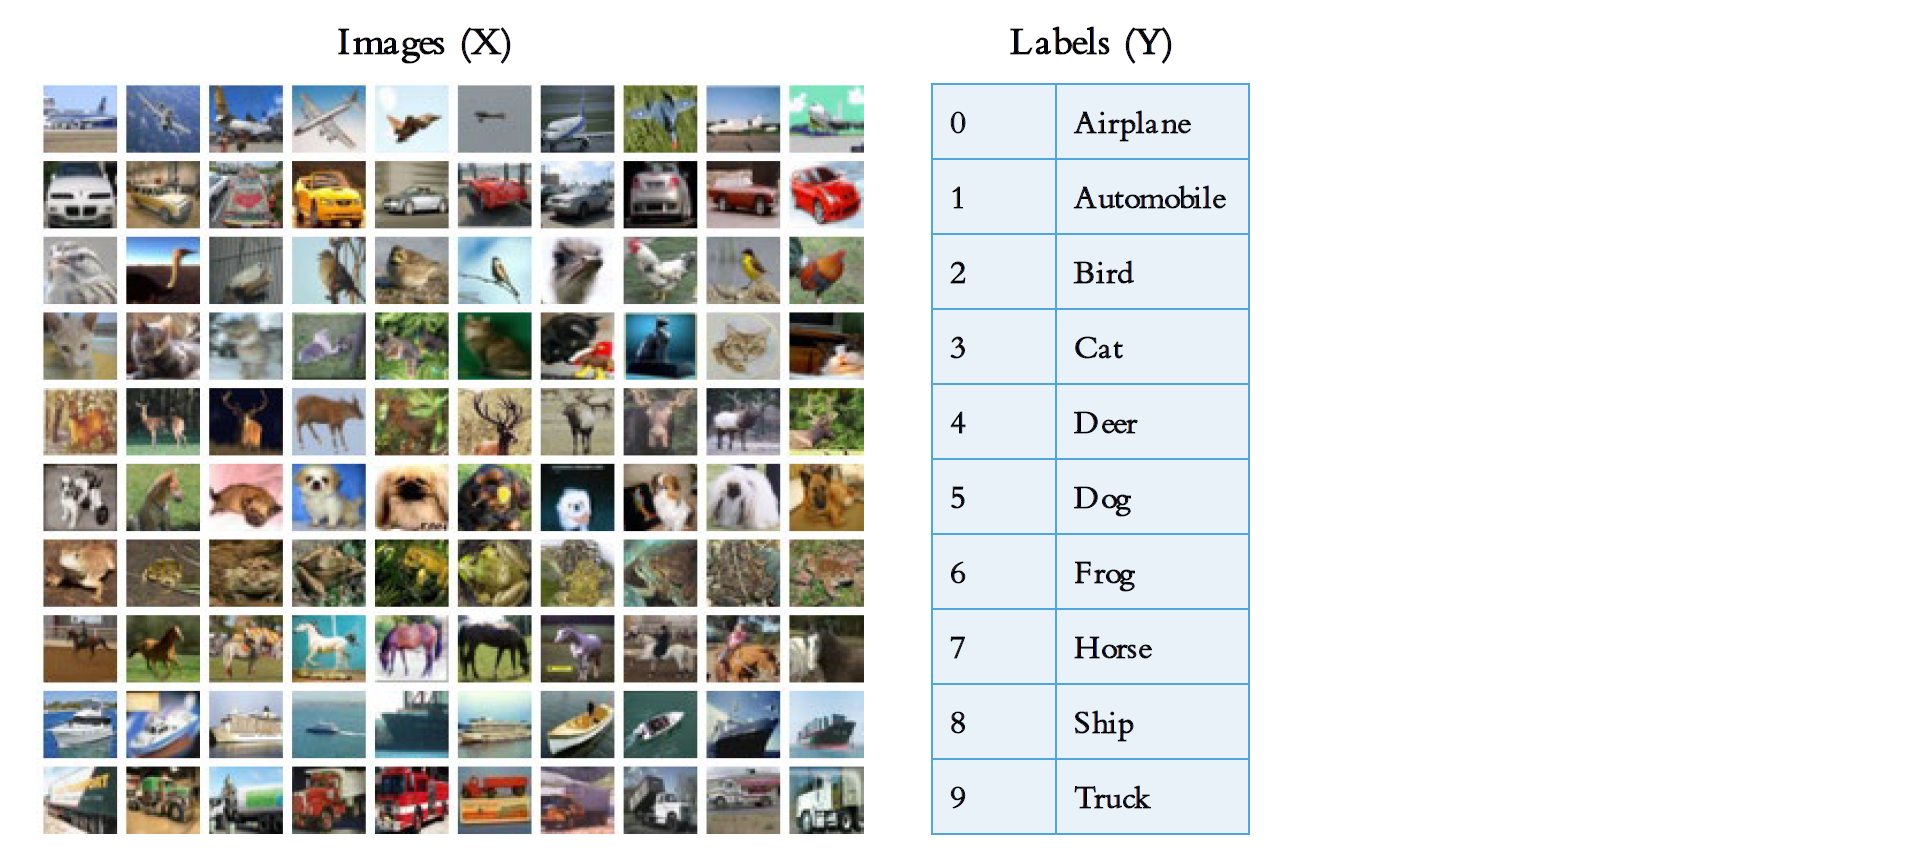

In [2]:
display(Image("./images/cifar3.png", width=1000))

### Import needed libraries 

In [1]:
#Basic Python packages for data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#Tensorflow & Keras related packages
import tensorflow as tf
from tensorflow import keras
from keras import layers

from utils import plot_history

In [2]:
# same steps as before. 

### Load Cifar Dataset Preloaded in Keras

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### Understanding the Data 

In [5]:
type(train_images)

numpy.ndarray

In [6]:
train_images.shape 

(50000, 32, 32, 3)

In [7]:
train_labels.shape 

(50000, 1)

In [8]:
test_images.shape

(10000, 32, 32, 3)

In [9]:
test_labels.shape

(10000, 1)

### Preprocess the Input Data

In [10]:
train_images.shape

(50000, 32, 32, 3)

In [11]:
# Scale the data
#-------------------------------------------------------------
train_images = train_images.astype("float32") / 255 
test_images = test_images.astype("float32") / 255 

### Build the Neural Network Model Architecture

In [12]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
# Build similar neural network except we are going to add augumentation layers

def model_cifar_augumented(): 
    inputs = keras.Input(shape = (32,32,3)) # Define Input shape
    
    augumentation_layers = keras.Sequential([layers.RandomFlip(), layers.RandomRotation(0.1),
                                             layers.RandomZoom(0.1), layers.RandomTranslation(0.2,0.2)])
    
    x = augumentation_layers(inputs)

    x = layers.Conv2D(filters=32, kernel_size = 3, activation="relu")(x) 
    # Convolution Layer with no padding and stride=1 (default)
    
    x = layers.MaxPooling2D(pool_size=2, strides = (2,2))(x) 
    # MaxPool Layer with size = 2 x 2, strides = 2

    x = layers.Conv2D(filters=64, kernel_size = 3, activation="relu")(x) 
    # Convolution Layer with no padding and stride=1 (default)
    
    x = layers.MaxPooling2D(pool_size=2, strides = (2,2))(x) 
    # MaxPool Layer with size = 2 x 2, strides = 2

    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) 
    # Convolution Layer with no padding and stride=1 (default)

    x = layers.Flatten()(x) 
    # Flatten

    outputs = layers.Dense(10, activation="softmax")(x) 
    # Dense output Layer
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

* **Dataset size is constant**: Augmentation does not change the dataset size but increases its effective variability.

* **Independently Random**: Each image in a batch undergoes independent random transformations 

* **Transformations Driven by Layer Parameters**: The specifics of the transformations are determined by the settings in each augmentation layer

For instance, if a batch contains 32 images, each image has an independent chance of being flipped, rotated, zoomed, or translated according to the specified probabilities and ranges in the augmentation layers.

In [14]:
model = model_cifar_augumented()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                         

### Compile & Train the Model

In [15]:
#Compile the Model by configuring the loss function, optimizer type, 
#..& metrics to monitor the model performance

# we will use sgd optimizer
sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9) 

#compile the model
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',  metrics = ["accuracy"]) 

C:\Users\sridh\anaconda3\envs\tf2.10_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# Call backs
# learning rate scheduler callback
def lr_scheduler(epoch):
    return 0.01 * (0.5 ** (epoch // 20))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler) 

#model checkpoint callback
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath = "./models/model_cifar_augumented.keras",
                                                   save_best_only=True, monitor="val_loss") 

callbacks = callbacks = [model_checkpoint, reduce_lr] 

In [17]:
# Train the model
history = model.fit(train_images, train_labels, epochs = 30, batch_size = 32, 
                    validation_split = 0.2, callbacks=callbacks)

Epoch 1/30
1250/1250 [==============================] - 407s 313ms/step - loss: 1.9362 - accuracy: 0.2852 - val_loss: 1.9903 - val_accuracy: 0.2770 - lr: 0.0100
Epoch 2/30
1250/1250 [==============================] - 401s 321ms/step - loss: 1.6620 - accuracy: 0.3900 - val_loss: 1.9995 - val_accuracy: 0.2856 - lr: 0.0100
Epoch 3/30
1250/1250 [==============================] - 471s 377ms/step - loss: 1.5528 - accuracy: 0.4349 - val_loss: 2.0544 - val_accuracy: 0.3023 - lr: 0.0100
Epoch 4/30
1250/1250 [==============================] - 412s 329ms/step - loss: 1.4869 - accuracy: 0.4618 - val_loss: 2.3286 - val_accuracy: 0.2663 - lr: 0.0100
Epoch 5/30
1250/1250 [==============================] - 438s 350ms/step - loss: 1.4348 - accuracy: 0.4818 - val_loss: 2.2881 - val_accuracy: 0.3051 - lr: 0.0100
Epoch 6/30
1250/1250 [==============================] - 416s 333ms/step - loss: 1.3865 - accuracy: 0.5035 - val_loss: 2.2582 - val_accuracy: 0.2833 - lr: 0.0100
Epoch 7/30
1250/1250 [============

Epoch 25/30
1250/1250 [==============================] - 387s 310ms/step - loss: 1.0034 - accuracy: 0.6470 - val_loss: 2.3044 - val_accuracy: 0.3504 - lr: 0.0050
Epoch 26/30
1250/1250 [==============================] - 405s 323ms/step - loss: 1.0039 - accuracy: 0.6470 - val_loss: 2.2419 - val_accuracy: 0.3428 - lr: 0.0050
Epoch 27/30
1250/1250 [==============================] - 410s 328ms/step - loss: 1.0030 - accuracy: 0.6483 - val_loss: 2.2037 - val_accuracy: 0.3474 - lr: 0.0050
Epoch 28/30
1250/1250 [==============================] - 494s 395ms/step - loss: 0.9887 - accuracy: 0.6528 - val_loss: 2.3179 - val_accuracy: 0.3427 - lr: 0.0050
Epoch 29/30
1250/1250 [==============================] - 494s 395ms/step - loss: 0.9941 - accuracy: 0.6508 - val_loss: 2.2341 - val_accuracy: 0.3551 - lr: 0.0050
Epoch 30/30
1250/1250 [==============================] - 424s 339ms/step - loss: 0.9827 - accuracy: 0.6577 - val_loss: 2.3194 - val_accuracy: 0.3469 - lr: 0.0050


### Plotting the loss & Accuracy curves

In [ ]:
plot_history(history)

In [ ]:
# Model started overfitting after 10th epoch

### Evaluate the trained model on previously unseen test data 

In [ ]:
model.evaluate(test_images, test_labels) 

In [ ]:
# Due to randomness of neural network initialization, numbers may be slightly different each time u train